### Problem 1: Rotation Matrix from Roll-Pitch-Yaw

Given a set of Roll-Pitch-Yaw angles $(\phi,\theta,\psi)$, where $\phi$ is the roll angle around the x-axis, $\theta$ is the pitch angle around the y-axis, and $\psi$ is the yaw angle around the z-axis, your task is to write a Python function that computes the corresponding rotation matrix $R$. Use the following equations for your implementation:

$R = R_z(\psi)R_y(\theta)R_x(\phi)$,

where $R_x(\phi)$, $R_y(\theta)$ and $R_z(\psi)$ are the rotation matrices around the x, y, and z axes, respectively. The matrices are defined as:

$R_x(\phi)=\begin{bmatrix} 1 & 0 & 0 \\ 0 & cos(\phi) & -sin(\phi) \\ 0 & sin(\phi) & cos(\phi) \end{bmatrix}$

$R_y(\theta)=\begin{bmatrix} cos(\theta) & 0 & sin(\theta) \\ 0 & 1 & 0 \\ -sin(\theta) & 0 & cos(\theta) \end{bmatrix}$

$R_z(\psi)=\begin{bmatrix} cos(\psi) & -sin(\psi) & 0 \\sin(\psi) & cos(\psi) & 0 \\ 0 & 0 & 1 \end{bmatrix}$

Validate your solution by visualizing the axes of the original and rotated frames.

Rotation Matrix:
 [[ 0.35355339 -0.5732233   0.73919892]
 [ 0.61237244  0.73919892  0.28033009]
 [-0.70710678  0.35355339  0.61237244]]


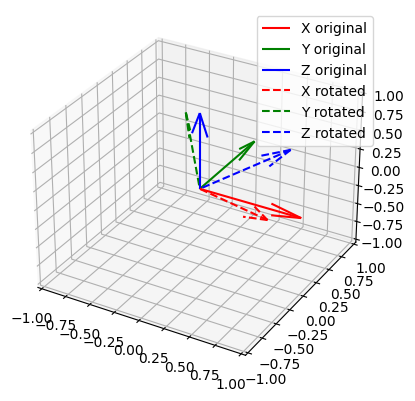

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Example usage
roll, pitch, yaw = 30*math.pi/180, 45*math.pi/180, 60*math.pi/180
# change degrees to radians
R_yaw = np.array([[math.cos(yaw), -math.sin(yaw), 0],
         [math.sin(yaw), math.cos(yaw), 0],
         [0, 0, 1]])

R_pitch = np.array([[math.cos(pitch), 0, math.sin(pitch)],
           [0, 1, 0],
           [-math.sin(pitch), 0, math.cos(pitch)]])

R_roll = np.array([[1, 0, 0],
          [0, math.cos(roll), -math.sin(roll)],
          [0, math.sin(roll), math.cos(roll)]])

R = R_yaw@R_pitch@R_roll
print("Rotation Matrix:\n", R)

# Visualization
def visualize_rotation(R):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Initial unit vectors
    vectors = np.eye(3)
    ax.quiver(0, 0, 0, vectors[0,0], vectors[1,0], vectors[2,0], color='r', label='X original')
    ax.quiver(0, 0, 0, vectors[0,1], vectors[1,1], vectors[2,1], color='g', label='Y original')
    ax.quiver(0, 0, 0, vectors[0,2], vectors[1,2], vectors[2,2], color='b', label='Z original')
    # Rotated vectors
    rotated_vectors = R @ vectors
    ax.quiver(0, 0, 0, rotated_vectors[0,0], rotated_vectors[1,0], rotated_vectors[2,0], color='r', linestyle='dashed', label='X rotated')
    ax.quiver(0, 0, 0, rotated_vectors[0,1], rotated_vectors[1,1], rotated_vectors[2,1], color='g', linestyle='dashed', label='Y rotated')
    ax.quiver(0, 0, 0, rotated_vectors[0,2], rotated_vectors[1,2], rotated_vectors[2,2], color='b', linestyle='dashed', label='Z rotated')
    ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
    ax.legend()
    plt.show()

visualize_rotation(R)

### Problem 2: Finding Roll-Pitch-Yaw from Rotation Matrix
Given a rotation matrix $R$, determine the corresponding Roll-Pitch-Yaw angles $(\phi,\theta,\psi)$. The equations relating the matrix elements to the angles are:

$\theta = arcsin(-R_{31})$

$\phi = arctan2(R_{32}, R_{33})$

$\psi = arctan2(R_{21}, R_{11})$

Write a Python function that takes in a rotation matrix and outputs the Roll-Pitch-Yaw angles. Test your function with a known set of angles and rotation matrix, and visualize the result to ensure correctness.

In [3]:
# Use the rotation matrix from Problem 1 as an example
pitch = math.asin(-R[2, 0]) * 180 / math.pi         # radian to degree
roll = math.atan2(R[2, 1], R[2, 2]) * 180 / math.pi # radian to degree
yaw = math.atan2(R[1, 0], R[0, 0]) * 180 / math.pi  # radian to degree
print("Recovered Roll-Pitch-Yaw angles (degrees):", roll, pitch, yaw)

Recovered Roll-Pitch-Yaw angles (degrees): 29.999999999999996 45.00000000000001 59.99999999999999


### Problem 3: Quaternion to Rotation Matrix Conversion
Quaternions offer a compact way to represent rotations. Given a unit quaternion $q=(w,x,y,z)$, write a Python function to convert it into a corresponding rotation matrix $R$. The relation is given by:

$R=\begin{bmatrix} 1-2y^2 - 2z^2 & 2xy-2zw & 2xz+2yw \\ 2xy+2zw & 1-2x^2-2z^2 & 2yz - 2xw \\ 2xz - 2yw & 2yz+2xw & 1-2x^2-2y^2 \end{bmatrix}$

Ensure the quaternion is normalized before conversion. Demonstrate the correctness of your function through visualization.

Rotation Matrix from Quaternion:
 [[ 3.02000e-04  0.00000e+00  9.99698e-01]
 [ 0.00000e+00  1.00000e+00  0.00000e+00]
 [-9.99698e-01  0.00000e+00  3.02000e-04]]


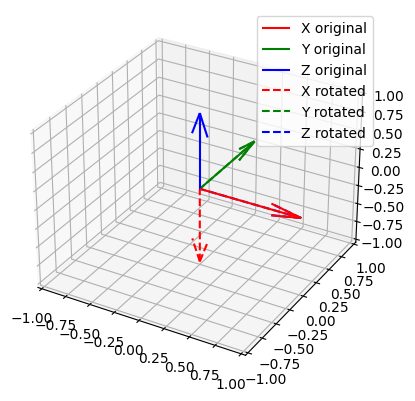

In [4]:
# Example quaternion (normalized)
q = np.array([0.707, 0, 0.707, 0])  # Represents a rotation of 90 degrees around the y-axis
w = q[0]
x = q[1]
y = q[2]
z = q[3]

def quarternion_2_rotation(w, x, y, z):
    R_from_q = np.array([[1 - 2*y**2 - 2*z**2, 2*x*y - 2*z*w, 2*x*z + 2*y*w],
            [2*x*y + 2*z*w, 1 - 2*x**2 - 2*z**2, 2*y*z - 2*x*w],
            [2*x*z - 2*y*w, 2*y*z + 2*x*w, 1 - 2*x**2 - 2*y**2]])
    return R_from_q

R_from_q = quarternion_2_rotation(w, x, y, z)

print("Rotation Matrix from Quaternion:\n", R_from_q)

visualize_rotation(R_from_q)

### Problem 4: Slerp (Spherical Linear Interpolation) between Quaternions
Given two unit quaternions $q_1$ and $q_2$, representing the start and end orientations, and a fraction $t\in[0,1]$, implement the Slerp algorithm to find the intermediate quaternion $q_t$ that represents the orientation at fraction $t$ between the two orientations. The Slerp formula is:

$q_t = \frac{sin((1-t)\Omega)}{sin(\Omega)}q_{1} + \frac{sin(t\Omega)}{sin(\Omega)}q_{2}$

where $\Omega = q_1^{\intercal}q_{2}$ is the dot product of the quaternions.

Validate your solution by interpolating between two known orientations and visualizing the intermediate orientations.

Interpolated Quaternion: [0.90975292 0.         0.37679866 0.        ]
Rotation Matrix from Slerp Interpolated Quaternion:
 [[ 0.71604554  0.          0.68558736]
 [ 0.          1.          0.        ]
 [-0.68558736  0.          0.71604554]]


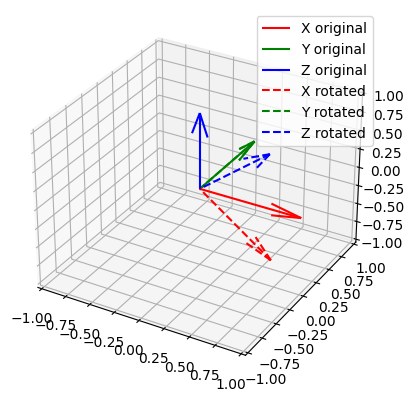

In [5]:
# Example quaternions and interpolation
q1 = np.array([1, 0, 0, 0])  # No rotation
q2 = np.array([0.707, 0, 0.707, 0])  # 90 degrees rotation around y-axis
t = 0.5  # Halfway between q1 and q2
Omega = q1.T@q2
qt = math.sin((1-t)*Omega)/math.sin(Omega)*q1 + math.sin(t*Omega)/math.sin(Omega)*q2
#qt = slerp(q1, q2, t)

R_slerp = quarternion_2_rotation(qt[0], qt[1], qt[2], qt[3])
print("Interpolated Quaternion:", qt)
print("Rotation Matrix from Slerp Interpolated Quaternion:\n", R_slerp)

visualize_rotation(R_slerp)

### Problem 5: Angular Velocity Vector to Skew-Symmetric Matrix
Given an angular velocity vector $\omega = [\omega_x, \omega_y, \omega_z]^{\intercal}$, your task is to write a Python function that converts this vector into its corresponding skew-symmetric matrix $[\omega]_{\times}$. The skew-symmetric matrix is used in computing cross products and is defined as:

$[\omega]_{\times}=\begin{bmatrix} 0 & -\omega_z & \omega_y \\ \omega_z & 0 & -\omega_x \\ -\omega_y & \omega_x & 0 \end{bmatrix}$

This matrix is crucial in representing angular velocities in rigid body dynamics and robotics.

In [6]:
# Example usage
omega = np.array([1, 2, 3])
def get_skew_matrix(vector):
    Skew = np.array([[0, -vector[2], vector[1]],
                     [vector[2], 0, -vector[0]],
                     [-vector[1], vector[0], 0]])
    return Skew

skew_symmetric_matrix = get_skew_matrix(omega)
print("Skew-Symmetric Matrix:\n", skew_symmetric_matrix)


Skew-Symmetric Matrix:
 [[ 0 -3  2]
 [ 3  0 -1]
 [-2  1  0]]


### Problem 6: Exponential Map for Rotation

Given an angular velocity vector $\omega$ and a time duration $t$, calculate the rotation matrix $R$ using the exponential map. The exponential map converts an angular velocity vector into a rotation matrix over the time $t$, assuming constant angular velocity. The rotation matrix $R$ can be obtained using Rodrigues' formula:

$R=\exp([\hat\omega]_{\times}t) = I + sin(\theta)[\hat\omega]_{\times} + (1-cos(\theta))[\hat\omega]_{\times}^{2}$

where $\theta = \|\omega\| t$ is the magnitude of rotation, $I$ is the identity matrix, and $[\omega]_{\times}$ is the skew-symmetric matrix of $\omega$.

Rotation Matrix:
 [[-0.18012236  0.10082983  0.97846271]
 [ 0.84326807  0.52795105  0.10082983]
 [-0.50641377  0.84326807 -0.18012236]]


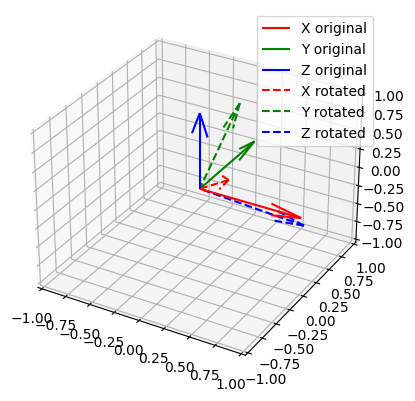

In [31]:
# Example usage
omega = np.array([0.5, 1, 0.5])
hat_omega = omega / np.linalg.norm(omega)
t = 2  # seconds
b_omega = get_skew_matrix(hat_omega)
theta = np.linalg.norm(hat_omega)*t
R = np.eye(3) + math.sin(theta)*b_omega + (1-math.cos(theta))*b_omega@b_omega
print("Rotation Matrix:\n", R)
# print(omega, "\n")
# print(hat_omega, "\n")
# print(b_omega, "\n")
# print(np.linalg.norm(b_omega), "\n")
# # print(b_omega.T/, "\n")
# print(np.linalg.norm(R), "\n")

visualize_rotation(R)

### Problem 7: Constructing Homogeneous Transformation Matrices

Given a rotation matrix $R$ that represents the orientation of a rigid body and a position vector $p$ that represents the location of the body frame's origin in the world frame, construct the corresponding homogeneous transformation matrix $T$.

A homogeneous transformation matrix combines both rotation and translation information into a single 4x4 matrix:

$T=\begin{bmatrix} R & p \\ 0 & 1 \end{bmatrix}$

In [30]:
# Example usage
R = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
p = np.array([1, 2, 3])

def get_homogeneous_T(R, p):
    T = np.array([[R[0,0], R[0,1], R[0,2], p[0]],
                  [R[1,0], R[1,1], R[1,2], p[1]],
                  [R[2,0], R[2,1], R[2,2], p[2]],
                  [0, 0, 0, 1]])
    
    return T

T = get_homogeneous_T(R, p)
print("Homogeneous Transformation Matrix:\n", T)


Homogeneous Transformation Matrix:
 [[ 0 -1  0  1]
 [ 1  0  0  2]
 [ 0  0  1  3]
 [ 0  0  0  1]]


### Problem 8: Exponential Coordinates for Rigid-Body Motion

Given a twist vector $\xi = [\omega;v]$ representing a rigid body's screw motion and a scalar $\theta$ representing the motion magnitude (e.g., rotation angle and translation distance for a screw motion), compute the corresponding homogeneous transformation matrix using the exponential map:

$T=\exp(\hat{\xi}\theta)$

where $\hat{\xi}$ is the 4x4 matrix representation of the twist and $\theta$ is the motion magnitude.

1.__Compute the Homogeneous Transformation Matrix__: Compute the homogeneous transformation matrix, $T$, that encapsulates the rigid body's rotation and translation in 3D space.

2.__Visualize the Transformation__: Using matplotlib, create a 3D visualization that shows both the original position of the rigid body (as a semi-transparent unit cube) and its transformed position. Highlight the transformation effect by altering the appearance (e.g., color) of the transformed rigid body.

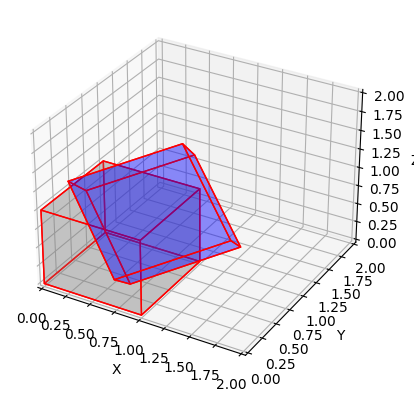

In [29]:
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_cube(ax, T, color='blue'):
    """
    Draw a cube transformed by the homogeneous transformation matrix T.
    """
    # Vertices of a cube
    v = np.array([[0, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 1],
                  [0, 0, 1, 1], [1, 0, 1, 1], [1, 1, 1, 1], [0, 1, 1, 1]])
    # Apply transformation
    v_transformed = np.dot(v, T.T)[:,:3]

    # Define the sides of the cube, each as a list of vertices
    verts = [[v_transformed[0], v_transformed[1], v_transformed[2], v_transformed[3]],
             [v_transformed[4], v_transformed[5], v_transformed[6], v_transformed[7]],
             [v_transformed[0], v_transformed[1], v_transformed[5], v_transformed[4]],
             [v_transformed[2], v_transformed[3], v_transformed[7], v_transformed[6]],
             [v_transformed[1], v_transformed[2], v_transformed[6], v_transformed[5]],
             [v_transformed[4], v_transformed[7], v_transformed[3], v_transformed[0]]]

    # Create a 3D polygon collection
    poly3d = Poly3DCollection(verts, alpha=0.25, linewidths=1, edgecolors='r')
    poly3d.set_facecolor(color)
    ax.add_collection3d(poly3d)

def visualize_transformation(omega, v, theta):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    b_omega = get_skew_matrix(omega)
    R = np.eye(3) + math.sin(theta)*b_omega + (1-math.cos(theta))*b_omega@b_omega
    T = get_homogeneous_T(R, v)
    
    draw_cube(ax, np.eye(4), 'grey')  # Original cube in grey
    draw_cube(ax, T, 'blue')  # Transformed cube in blue

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_zlim([0, 2])
    plt.show()

# Example usage
omega = np.array([1, 0, 1])     # Rotation about z-axis
v = np.array([1, 0, 0])         # Translation along x-axis
theta = math.pi/4                       # Rotation angle (45 degrees)
p = (np.eye(3)*theta + (1-math.cos(theta))*get_skew_matrix(omega) + (theta-math.sin(theta))*get_skew_matrix(omega)@get_skew_matrix(omega))@v.T
visualize_transformation(omega, p, theta)